# Black Friday- Sales Prediction


**Problem Statement**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.


The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.



Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import os 
os.chdir("F://")
os.getcwd()


'F:\\'

## Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Loading the dataset

In [3]:
df = pd.read_csv("blackfriday.csv")

## Stage-1
# Data Cleaning and Preprocessing

In [4]:
df.shape

(550068, 12)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.describe()

C:\Users\shivam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,NaN,NaN,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,NaN,NaN,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,NaN,NaN,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# Checking whether the dataset contains null values
df.isnull().values.any()

True

In [8]:
df.dtypes         ## Find data types

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<a id='Missing Value Treatment'></a>
## Missing Value Treatment ##
 
***Why missing values treatment is required?***

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

***Why my data has missing values?***

We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

**Data Extraction**: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.

**Data collection**: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:

1)**Missing completely at random**: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.

2)**Missing at random**: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.

3)**Missing that depends on unobserved predictors**: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.

4)**Missing that depends on the missing value itself**: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.
 
***Which are the methods to treat missing values ?**

**Deletion**:  It is of two types: List Wise Deletion and Pair Wise Deletion.
In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.

Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output.

**Mean/ Mode/ Median Imputation**: Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:- ***Generalized Imputation***: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.

**Prediction Model**:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data. In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, ANOVA, Logistic regression and various modeling technique to perform this. There are 2 drawbacks for this approach:
1)The model estimated values are usually more well-behaved than the true values
2)If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

**KNN Imputation**: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

*Advantages*:
k-nearest neighbour can predict both qualitative & quantitative attributes Creation of predictive model for each attribute with missing data is not required Attributes with multiple missing values can be easily treated Correlation structure of the data is taken into consideration

*Disadvantage*:
KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

After dealing with missing values, the next task is to deal with outliers. Often, we tend to neglect outliers while building models. This is a discouraging practice. Outliers tend to make your data skewed and reduces accuracy. Let’s learn more about outlier treatment.

 


In [10]:
df.isnull().sum()   ## Find number of NA in each colunm

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
df.isnull().sum().sum()  # Total NA in data

556885

In [12]:
df['Product_Category_2'].median()                    ## Find median of Product_Category_2 to fill NA

9.0

In [13]:
df['Product_Category_2'].fillna(value=9,inplace=True)            ## Filling NA for Product_Category_2

In [14]:
df['Product_Category_3'].median()                 ## Find median of Product_Category_2 to fill NA

14.0

In [15]:
df['Product_Category_3'].fillna(value=14,inplace=True)    ## Filling NA for Product_Category_2

In [16]:
df.isnull().sum().sum()    ## There are no NA in the train data

0

## Step 2
# Exploratory Data Visualizaation

In [17]:
## Find Unique value in User ID

df.User_ID.nunique()

5891

In [18]:
## Number of unique in Product ID

df.Product_ID.nunique()      ## There are 3631 unique product ID outof 550068 observations

3631

In [19]:
## Number of Categorical variable

(df.dtypes=='object').sum()  ## There are 5 categorical variables

5

<a id='Univariate Analysis'></a>
## Univariate Analysis ##

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

**Continuous Variables**:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods like ** Histogram & Boxplot **.
We will use Matplotlib & Seaborn package.

In [20]:
## which continuous variables in data

df.dtypes  ## data types of variables

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [21]:
(df.dtypes=='int64').sum()                 # there are 5 variables which have integer as dtype

5

In [22]:
(df.dtypes=='float64').sum()               # there are 2 variables which have float as dtype

2

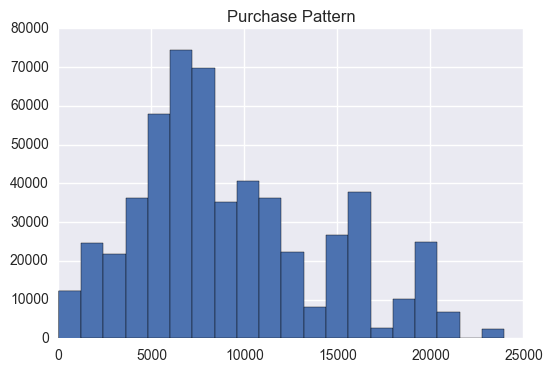

In [23]:
# Check the distribution of dependent variable i.e Purchase
df['Purchase'].hist(bins=20).set_title('Purchase Pattern')

Looking at Purchase Pattern we can see that number of count is more at 6000 & 7000 and above 15000 have very less count.

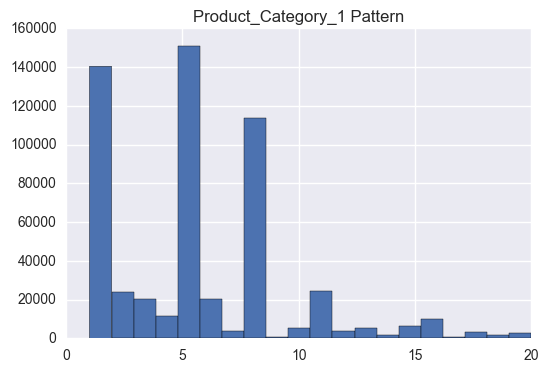

In [24]:
# Check the distribution of dependent variable i.e Product Category 1

df['Product_Category_1'].hist(bins=20).set_title('Product_Category_1 Pattern')

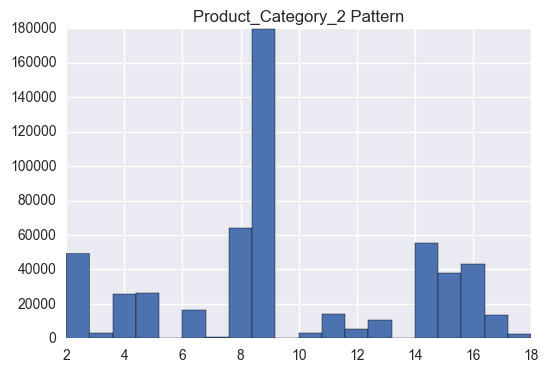

In [25]:
# Check the distribution of Product_Category_2 

df['Product_Category_2'].hist(bins=20).set_title('Product_Category_2 Pattern')

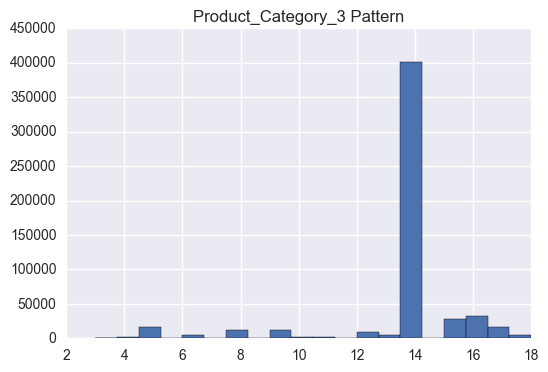

In [26]:
# Check the distribution of Product_Category_3 

df['Product_Category_3'].hist(bins=20).set_title('Product_Category_3 Pattern')

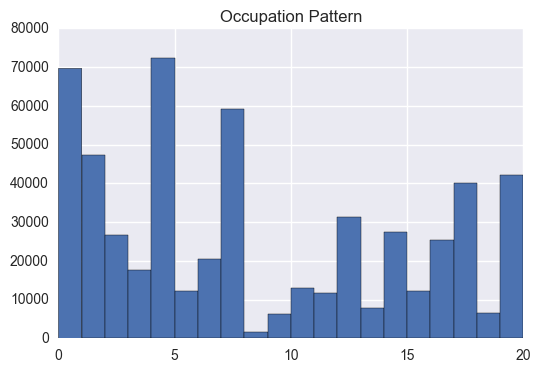

In [27]:
# Check the distribution of Occupation

df['Occupation'].hist(bins=20).set_title('Occupation Pattern')

**Categorical Variables**:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

In [28]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

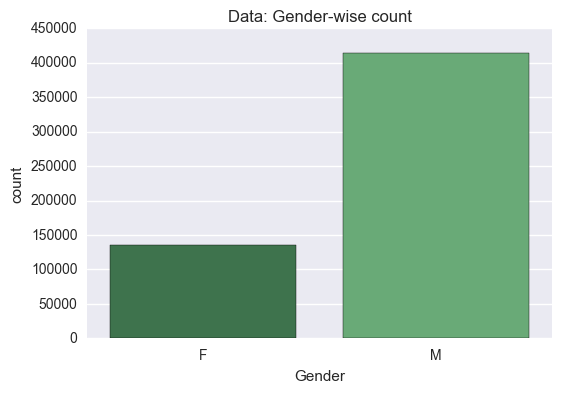

In [29]:
# Number of Gender count

dim = (10,10)
sns.countplot(x="Gender", data=df, palette="Greens_d").set_title('Data: Gender-wise count')

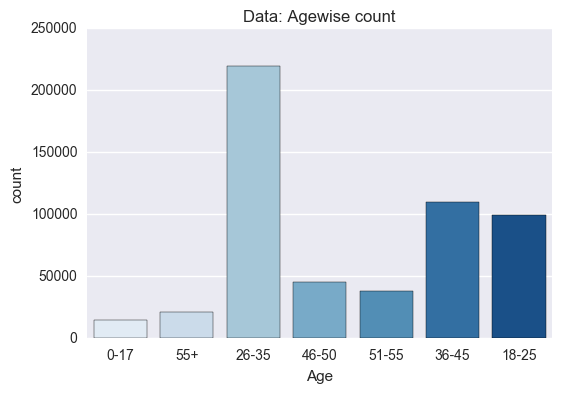

In [30]:
## Number of count of Age

dim = (10,10)
sns.countplot(x='Age',data=df,palette="Blues").set_title('Data: Agewise count')

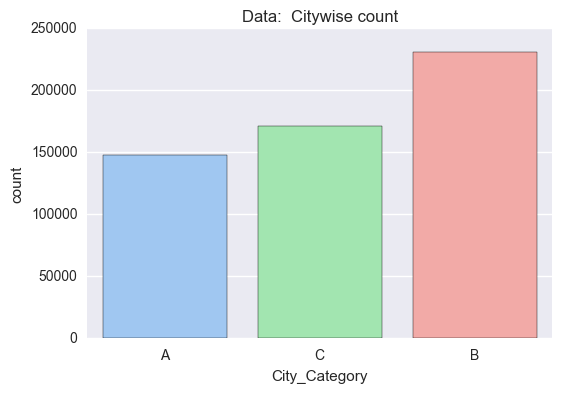

In [31]:
## Number of count of City

dim = (10,10)

sns.countplot(x='City_Category',data=df,palette="pastel").set_title('Data:  Citywise count')

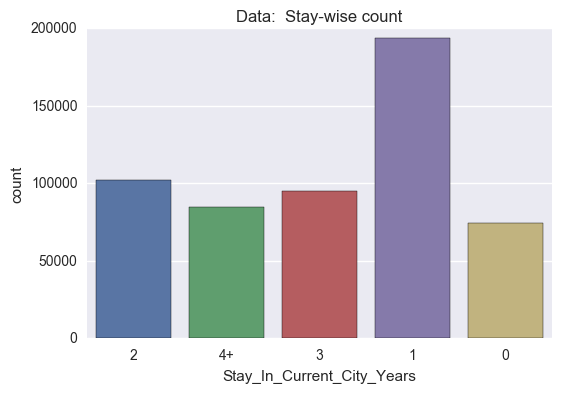

In [32]:
## Number of count of stay

dim = (10,10)
sns.countplot(x='Stay_In_Current_City_Years',data=df,palette="deep").set_title('Data:  Stay-wise count')


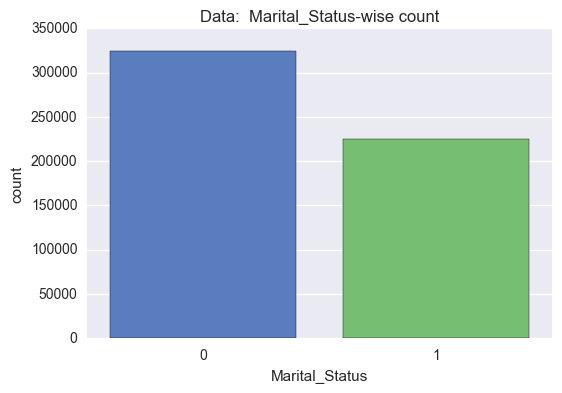

In [33]:
## Number of count of Marital_Status

sns.countplot(x='Marital_Status',data=df,palette="muted").set_title('Data:  Marital_Status-wise count')

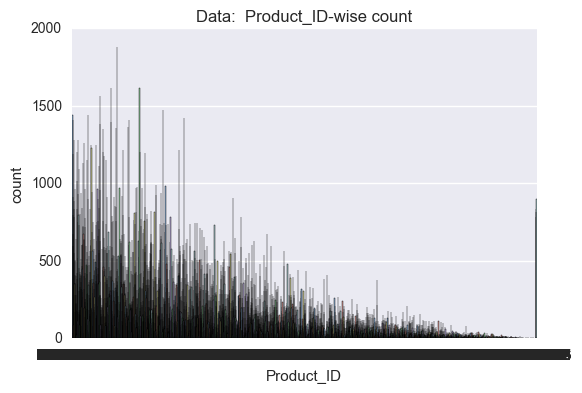

In [34]:
## Number of count of Product_ID 

sns.countplot(x='Product_ID',data=df,palette="pastel").set_title('Data:  Product_ID-wise count')

<a id='Bi-variate Analysis'></a>
## Bi-variate Analysis ##

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

**Continuous & Continuous**: While doing bi-variate analysis between two continuous variables, we should look at **scatter plot**. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

In [35]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

**Categorical & Continuous**: While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

1) *Z-Test/ T-Test*:- Either test assess whether mean of two groups are statistically different from each other or not.

***If the probability of Z is small then the difference of two averages is more significant**. The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.

2) *ANOVA*:- It assesses whether the average of more than two groups is statistically different.

Example: Suppose, we want to test the effect of five different exercises. For this, we recruit 20 men and assign one type of exercise to 4 men (5 groups). Their weights are recorded after a few weeks. We need to find out whether the effect of these exercises on them is significantly different or not. This can be done by comparing the weights of the 5 groups of 4 men each.


In [36]:
from scipy import stats

In [37]:
gender_grp = df.groupby(['Gender'])
gender_grp['Purchase'].describe()

Gender       
F       count    135809.000000
        mean       8734.565765
        std        4767.233289
        min          12.000000
        25%        5433.000000
        50%        7914.000000
        75%       11400.000000
        max       23959.000000
M       count    414259.000000
        mean       9437.526040
        std        5092.186210
        min          12.000000
        25%        5863.000000
        50%        8098.000000
        75%       12454.000000
        max       23961.000000
Name: Purchase, dtype: float64

OrderedDict([('F', <matplotlib.axes._subplots.AxesSubplot at 0x1db5cb0b0b8>),
             ('M', <matplotlib.axes._subplots.AxesSubplot at 0x1db5dbdf9b0>)])

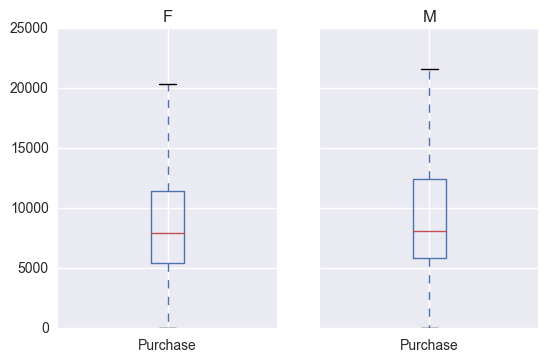

In [38]:
gender_grp.boxplot(column=['Purchase'],return_type='axes')

**Boxplot shows Female & Male are not significantly different but we will check by Hypothesis**

In [39]:
# make purchase data for hypotheis of Female & Male to find out either F & M are significantly different

M_purchase = df[df['Gender']=='F']['Purchase']
F_purchase = df[df['Gender']=='M']['Purchase']

In [40]:
stats.ttest_ind(M_purchase, F_purchase,equal_var=False)  ## equal_var means if True means they have same sd 

Ttest_indResult(statistic=-46.358248669626064, pvalue=0.0)

**By doing Hypothesis we can say that they have mean purchase difference i.e they are significant**

OrderedDict([('0-17',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db6c52bb70>),
             ('18-25',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db62264a20>),
             ('26-35',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db626f2668>),
             ('36-45',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db62a5e630>),
             ('46-50',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db62ee82b0>),
             ('51-55',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db6b0e2eb8>),
             ('55+',
              <matplotlib.axes._subplots.AxesSubplot at 0x1db637852b0>)])

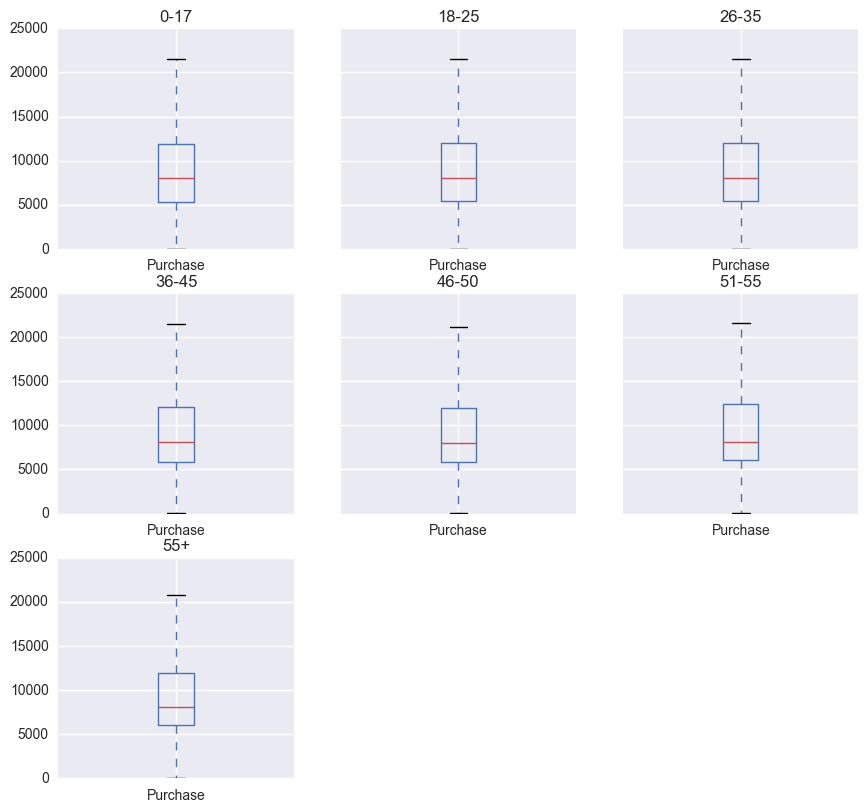

In [41]:
## Age wise hypothesis

age_grp = df.groupby(['Age'])
age_grp.boxplot(column=['Purchase'],return_type='axes',figsize=(10,10))

In [42]:
age_grp['Purchase'].describe()

Age         
0-17   count     15102.000000
       mean       8933.464640
       std        5111.114046
       min          12.000000
       25%        5328.000000
       50%        7986.000000
       75%       11874.000000
       max       23955.000000
18-25  count     99660.000000
       mean       9169.663606
       std        5034.321997
       min          12.000000
       25%        5415.000000
       50%        8027.000000
       75%       12028.000000
       max       23958.000000
26-35  count    219587.000000
       mean       9252.690633
       std        5010.527303
       min          12.000000
       25%        5475.000000
       50%        8030.000000
       75%       12047.000000
       max       23961.000000
36-45  count    110013.000000
       mean       9331.350695
       std        5022.923879
       min          12.000000
       25%        5876.000000
       50%        8061.000000
       75%       12107.000000
       max       23960.000000
46-50  count     45701.0000

In [43]:
## subset the data as per levels from Age

p_0to17 = df[df['Age']=='0-17']['Purchase']
p_18to25 = df[df['Age']=='18-25']['Purchase']
p_26to35 = df[df['Age']=='26-35']['Purchase']
p_36to45 = df[df['Age']=='36-45']['Purchase']
p_46to50 = df[df['Age']=='46-50']['Purchase']
p_51to55 = df[df['Age']=='51-55']['Purchase']
p_55 = df[df['Age']=='55+']['Purchase']

In [44]:
## Test the anova

stats.f_oneway(p_0to17,p_18to25,p_26to35,p_36to45,p_46to50,p_51to55,p_55)

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

*Age groups have different purchase mean,so we will consider this Age variable for model building.


In [45]:
grp_marital = df.groupby(['Marital_Status'])
grp_marital['Purchase'].describe()

Marital_Status       
0               count    324731.000000
                mean       9265.907619
                std        5027.347859
                min          12.000000
                25%        5605.000000
                50%        8044.000000
                75%       12061.000000
                max       23961.000000
1               count    225337.000000
                mean       9261.174574
                std        5016.897378
                min          12.000000
                25%        5843.000000
                50%        8051.000000
                75%       12042.000000
                max       23961.000000
Name: Purchase, dtype: float64

OrderedDict([(0, <matplotlib.axes._subplots.AxesSubplot at 0x1db6a2c3390>),
             (1, <matplotlib.axes._subplots.AxesSubplot at 0x1db6927b390>)])

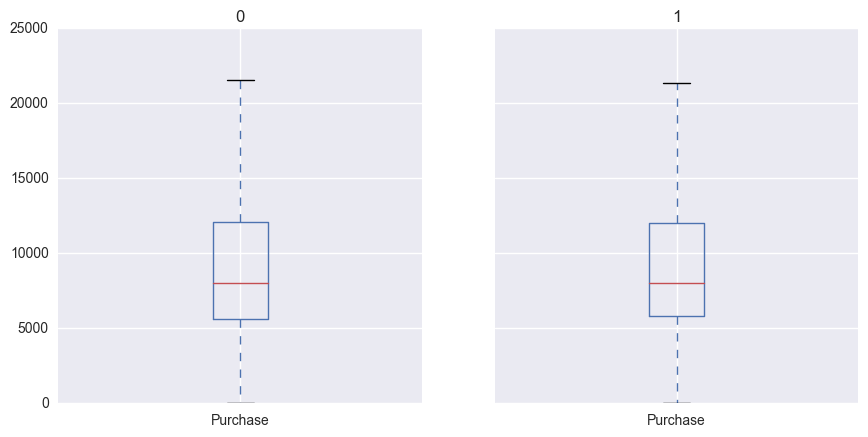

In [46]:
grp_marital.boxplot(column=['Purchase'],return_type='axes',figsize=(10,5))

In [47]:
## subset Marital status

m0 = df[df['Marital_Status']== 0]['Purchase']
m1 = df[df['Marital_Status']== 1]['Purchase']

## Test Anova 
stats.f_oneway(m0,m1)

F_onewayResult(statistic=0.11810893524268033, pvalue=0.73109475264753288)

In [48]:
city_grp = df.groupby(['City_Category'])
city_grp['Purchase'].describe()

City_Category       
A              count    147720.000000
               mean       8911.939216
               std        4892.115238
               min          12.000000
               25%        5403.000000
               50%        7931.000000
               75%       11786.000000
               max       23961.000000
B              count    231173.000000
               mean       9151.300563
               std        4955.496566
               min          12.000000
               25%        5460.000000
               50%        8005.000000
               75%       11986.000000
               max       23960.000000
C              count    171175.000000
               mean       9719.920993
               std        5189.465121
               min          12.000000
               25%        6031.500000
               50%        8585.000000
               75%       13197.000000
               max       23961.000000
Name: Purchase, dtype: float64

OrderedDict([('A', <matplotlib.axes._subplots.AxesSubplot at 0x1db691cf9b0>),
             ('B', <matplotlib.axes._subplots.AxesSubplot at 0x1db6910ff60>),
             ('C', <matplotlib.axes._subplots.AxesSubplot at 0x1db69098eb8>)])

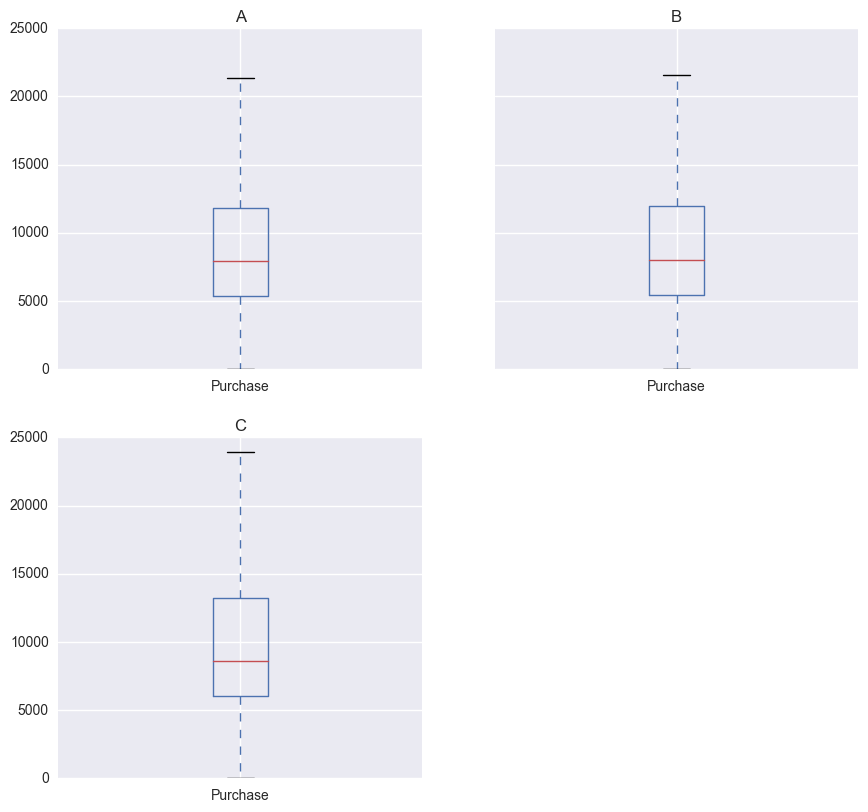

In [49]:
city_grp.boxplot(column=['Purchase'],return_type='axes',figsize=(10,10))

In [50]:
# Subset City_Category
city_A = df[df['City_Category']=='A']['Purchase']
city_B = df[df['City_Category']=='B']['Purchase']
city_C = df[df['City_Category']=='C']['Purchase']

# Test ANOVA
stats.f_oneway(city_A,city_B,city_C)

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

*City_Category variables groups have signifiacntly different purchase mean, we can take this variable for analysis.*

In [51]:
# group Stay_In_Current_City_Years
grp_yrs = df.groupby(['Stay_In_Current_City_Years'])
grp_yrs['Purchase'].describe()

Stay_In_Current_City_Years       
0                           count     74398.000000
                            mean       9180.075123
                            std        4990.479940
                            min          12.000000
                            25%        5480.000000
                            50%        8025.000000
                            75%       11990.000000
                            max       23960.000000
1                           count    193821.000000
                            mean       9250.145923
                            std        5027.476933
                            min          12.000000
                            25%        5500.000000
                            50%        8041.000000
                            75%       12042.000000
                            max       23961.000000
2                           count    101838.000000
                            mean       9320.429810
                            std        5044.5882

OrderedDict([('0', <matplotlib.axes._subplots.AxesSubplot at 0x1db68ef3dd8>),
             ('1', <matplotlib.axes._subplots.AxesSubplot at 0x1db68e7b7f0>),
             ('2', <matplotlib.axes._subplots.AxesSubplot at 0x1db68e08160>),
             ('3', <matplotlib.axes._subplots.AxesSubplot at 0x1db68daf048>),
             ('4+', <matplotlib.axes._subplots.AxesSubplot at 0x1db68d3c978>)])

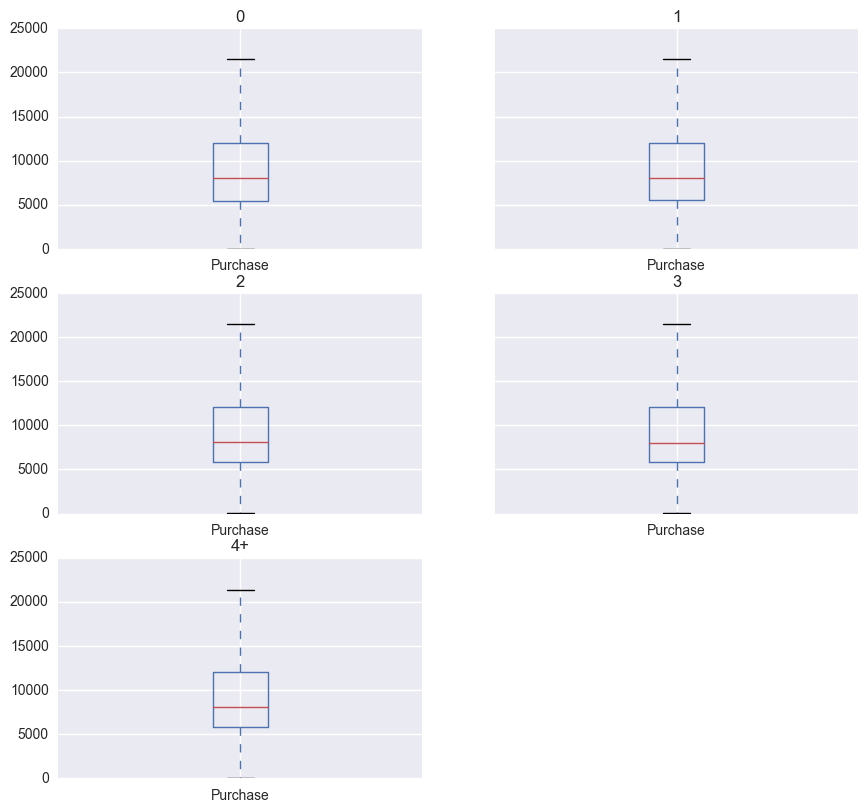

In [52]:
grp_yrs.boxplot(column=['Purchase'],return_type='axes',figsize=(10,10))

In [53]:
# subset Product ID

p1 = df[df['Product_ID']=='P00000142']['Purchase']
p2 = df[df['Product_ID']=='P00000242']['Purchase']
p3 = df[df['Product_ID']=='P00000342']['Purchase']
p4 = df[df['Product_ID']=='P00000442']['Purchase']
p5 = df[df['Product_ID']=='P0099642']['Purchase']
p6 = df[df['Product_ID']=='P0099742']['Purchase']
p7 = df[df['Product_ID']=='P0099842']['Purchase']
p8 = df[df['Product_ID']=='P0099942']['Purchase']

# test anova
stats.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8)

F_onewayResult(statistic=267.68059686458616, pvalue=9.8438891529135884e-286)

*Product ID groups have significant difference in purchase mean*

In [54]:
# group Product_Category_1
grp_cat1 = df.groupby(['Product_Category_1'])
grp_cat1['Purchase'].describe()

Product_Category_1       
1                   count    140378.000000
                    mean      13606.218596
                    std        4298.834894
                    min        3790.000000
                    25%       11546.000000
                    50%       15245.000000
                    75%       15812.000000
                    max       19708.000000
2                   count     23864.000000
                    mean      11251.935384
                    std        3570.642713
                    min        3176.000000
                    25%        9645.750000
                    50%       12728.500000
                    75%       13212.000000
                    max       16504.000000
3                   count     20213.000000
                    mean      10096.705734
                    std        2824.626957
                    min        2638.000000
                    25%        8198.000000
                    50%       10742.000000
                    75%     

In [55]:
# group Product_Category_2
grp_cat2 = df.groupby(['Product_Category_2'])
grp_cat2['Purchase'].describe()

Product_Category_2       
2.0                 count    49217.000000
                    mean     13619.356401
                    std       4275.570831
                    min       3790.000000
                    25%      11551.000000
                    50%      15241.000000
                    75%      15810.000000
                    max      19708.000000
3.0                 count     2884.000000
                    mean     11235.359570
                    std       3581.718925
                    min       3177.000000
                    25%       9651.500000
                    50%      12714.500000
                    75%      13188.250000
                    max      19573.000000
4.0                 count    25677.000000
                    mean     10215.192001
                    std       3172.992496
                    min       2639.000000
                    25%       8174.000000
                    50%      10681.000000
                    75%      13066.000000
        

In [56]:
# group Product_Category_3
grp_cat3 = df.groupby(['Product_Category_3'])
grp_cat3['Purchase'].describe()

Product_Category_3       
3.0                 count      613.000000
                    mean     13939.696574
                    std       4262.999709
                    min       3846.000000
                    25%      11590.000000
                    50%      15288.000000
                    75%      15886.000000
                    max      19698.000000
4.0                 count     1875.000000
                    mean      9794.386667
                    std       4085.114927
                    min       3177.000000
                    25%       6641.000000
                    50%       9850.000000
                    75%      12910.500000
                    max      19680.000000
5.0                 count    16658.000000
                    mean     12117.786889
                    std       3931.937020
                    min       2639.000000
                    25%       9834.250000
                    50%      11767.500000
                    75%      15334.000000
        

In [57]:
# group Occupation
grp_occ = df.groupby(['Occupation'])
grp_occ['Purchase'].describe()

Occupation       
0           count    69638.000000
            mean      9124.428588
            std       4971.757402
            min         12.000000
            25%       5445.000000
            50%       8001.000000
            75%      11957.000000
            max      23961.000000
1           count    47426.000000
            mean      8953.193270
            std       4838.482159
            min         12.000000
            25%       5825.000000
            50%       7966.000000
            75%      11702.750000
            max      23960.000000
2           count    26588.000000
            mean      8952.481683
            std       4939.418663
            min         12.000000
            25%       5419.000000
            50%       7952.000000
            75%      11718.000000
            max      23955.000000
3           count    17650.000000
            mean      9178.593088
            std       5000.942719
            min         12.000000
            25%       5478.000

In [58]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [59]:
### Pivot Table 

impute_grps = df.pivot_table(values=["Purchase"], index=["Gender","City_Category","Stay_In_Current_City_Years","Occupation"], aggfunc=np.mean)
impute_grps

Purchase
Gender City_Category Stay_In_Current_City_Years Occupation              
F      A             0                          0            9076.943075
                                                1            7740.089076
                                                2            7469.801178
                                                3            5854.000000
                                                4            9290.190926
                                                6           10941.537500
                                                7            7963.650124
                                                8           12992.071429
                                                9           10109.862069
                                                10           5631.365714
                                                11           8031.942857
                                                12           6733.936170
                                                14           9187.691429
                                                15           9905.491525
                                                17           9752.066667
                                                19           9797.644330
                                                20          10551.464646
                     1                          0            9289.372696
                                                1            8738.075061
                                                2            8161.251721
                                                3            9559.028037
                                                4            9539.525656
                                                6            9051.387676
                                                7            8334.077356
                                                9            9071.531250
                                                10           7998.619760
                                                11           9283.222222
                                                13           9381.538462
                                                14           7563.811518
                                                15          10370.326761
...                                                                  ...
M      C             3                          11           9417.670103
                                                12           9676.302842
                                                13           9427.476190
                                                14           9887.355856
                                                15           9888.273159
                                                16           9771.457297
                                                17          10337.822024
                                                18           9233.128713
                                                19           8119.732308
                                                20          10329.474083
                     4+                         0            9288.373777
                                                1            9566.927503
                                                2           10530.136722
                                                3           11362.631579
                                                4           10173.145023
                                                5           10422.669355
                                                6            8849.021563
                                                7           10056.891414
                                                8            9826.254098
                                                10           9712.930175
                                                11           9604.054233
                                                12          10091.613767
                                                1

**Categorical & Categorical**: To find the relationship between two categorical variables, we can use following methods:

*Two-way table*: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

*Stacked Column Chart*: This method is more of a visual form of Two-way table.

*Chi-Square Test*: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.

Probability of 0: It indicates that both categorical variable are dependent
Probability of 1: It shows that both variables are independent.
Probability less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence.


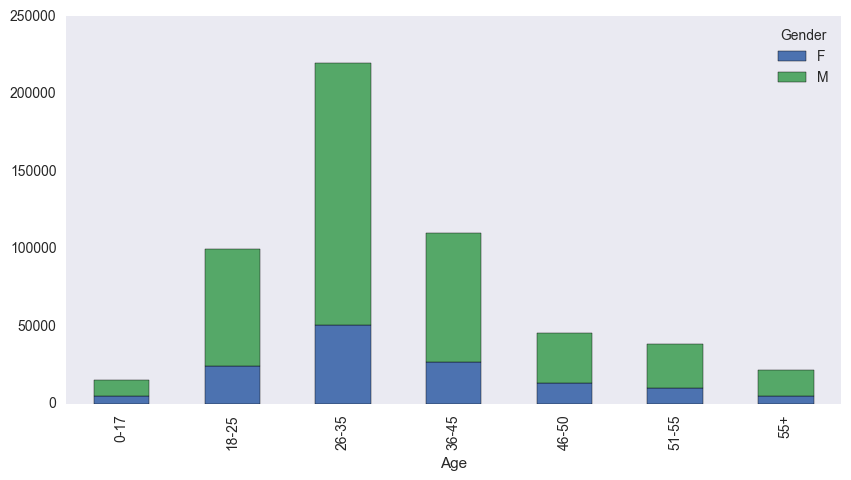

In [60]:
## Stacked chart for visualization

var = df.groupby(['Age','Gender']).Gender.count()
var.unstack().plot(kind='bar',stacked=True, grid=False,figsize=(10,5))

In [61]:
## Chi-sq test

chi_AG = pd.crosstab(df['Gender'],df['Age'])
chi_AG

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,5083,24628,50752,27170,13199,9894,5083
M,10019,75032,168835,82843,32502,28607,16421


In [62]:
stats.chi2_contingency(chi_AG)

(1412.7156576195039,
 4.2750569064909935e-302,
 6,
 array([[   3728.60722311,   24605.54865944,   54214.9168521 ,
           27161.65186304,   11283.34516642,    9505.70167507,
            5309.22856083],
        [  11373.39277689,   75054.45134056,  165372.0831479 ,
           82851.34813696,   34417.65483358,   28995.29832493,
           16194.77143917]]))

                                     Gender & Age are dependent on each other

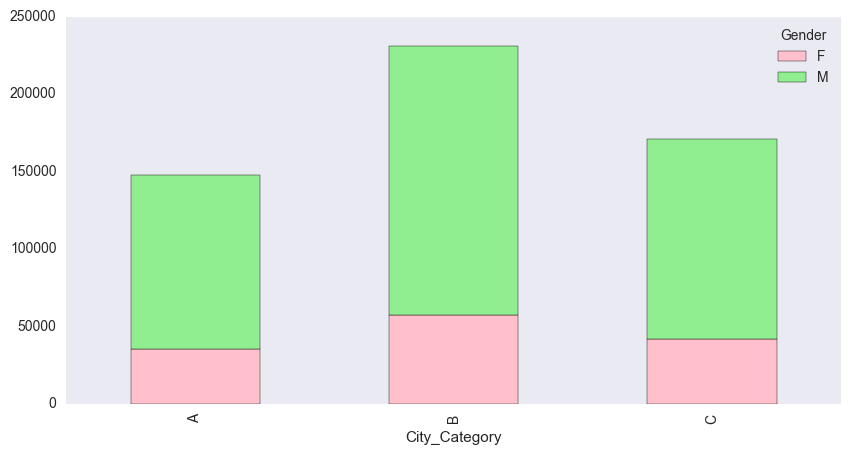

In [63]:
# stack 
var1 = df.groupby(['City_Category','Gender']).Gender.count()
var1.unstack().plot(kind='bar',stacked=True, grid=False,figsize=(10,5),color=['pink','lightgreen'])

In [64]:
## cross tab

chi_GC = pd.crosstab(df['Gender'],df['City_Category'])
chi_GC

City_Category,A,B,C
Gender,,,
F,35704,57796,42309
M,112016,173377,128866


In [65]:
stats.chi2_contingency(chi_GC)

(33.58382571304351,
 5.097590042852447e-08,
 2,
 array([[  36471.3189642,   57075.4415036,   42262.2395322],
        [ 111248.6810358,  174097.5584964,  128912.7604678]]))

                                              Gender & City_Category dependent

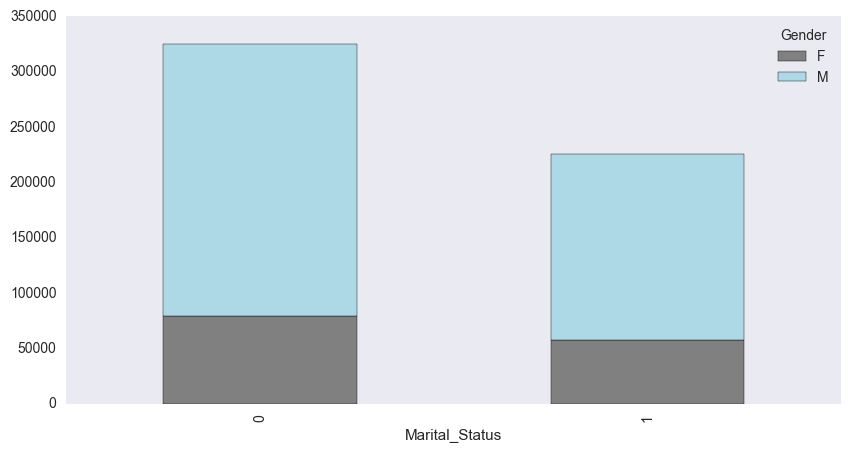

In [66]:
# stack 
var2 = df.groupby(['Marital_Status','Gender']).Gender.count()
var2.unstack().plot(kind='bar',stacked=True, grid=False,figsize=(10,5),color=['grey','lightblue'])

In [67]:
## cross tab

chi_Gm = pd.crosstab(df['Gender'],df['Marital_Status'])
chi_Gm

Marital_Status,0,1
Gender,,
F,78821,56988
M,245910,168349


In [68]:
stats.chi2_contingency(chi_Gm)

(74.002726975234722,
 7.8009189454074494e-18,
 1,
 array([[  80174.43730412,   55634.56269588],
        [ 244556.56269588,  169702.43730412]]))

<a id='Outlier'></a>
## Outlier ##
Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**

Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

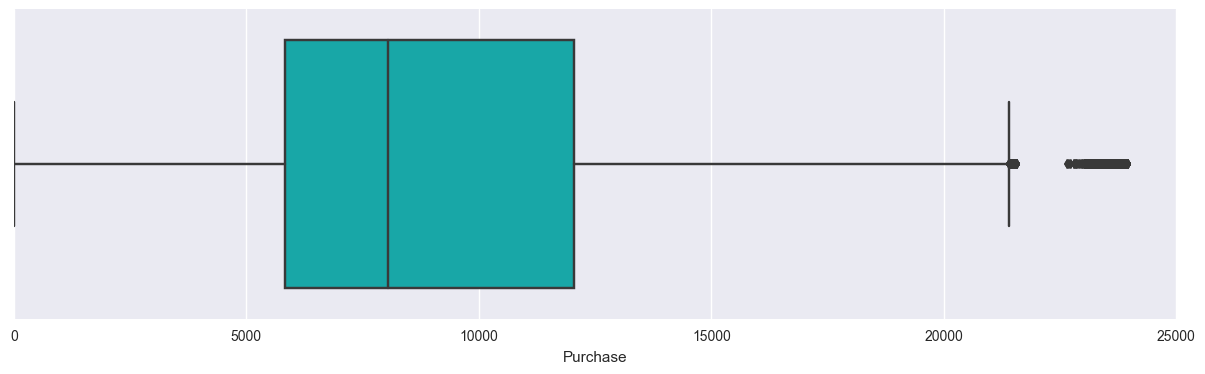

In [69]:
plt.figure(figsize=(15, 4))
sns.boxplot(df['Purchase'],color='c')

## Variable Transformation##
What are the common methods of Variable Transformation?

There are various methods used to transform variables. As discussed, some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods.

**Logarithm**: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.

**Square / Cube root**: The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.

**Binning**: It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.
 

# Data Preparation #

<a id='Label encoding'></a>
### Label Encoding ###


In [70]:
#Label Encoding

df = df.ix[:,[0,1,2,3,4,5,6,7,8,9,10,11]] #for subseting by index

#Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns.values:
    # Encoding only categorical variables
    if df[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=df[col]
        le.fit(data.values)
        df[col]=le.transform(df[col])

<a id='Dummy Variables'></a>
### Dummy Variables ###

In [71]:
## Create dummy variables 

df = pd.get_dummies(df, columns=['City_Category','Age','Stay_In_Current_City_Years'])
print (df.shape)

(550068, 24)


In [72]:
df.to_csv('blackfriday_modified.csv')

In [73]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_0,...,Age_2,Age_3,Age_4,Age_5,Age_6,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,672,0,10,0,3,9.0,14.0,8370,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000001,2376,0,10,0,1,6.0,14.0,15200,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000001,852,0,10,0,12,9.0,14.0,1422,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000001,828,0,10,0,12,14.0,14.0,1057,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000002,2734,1,16,0,8,9.0,14.0,7969,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<a id='Data Spliting'></a>
## Data Spliting ##

In [74]:
# Moving the Purchase column to the last
Purchase = df["Purchase"]
df.drop(labels = ['Purchase'], axis = 1, inplace= True)
df.insert(23,"Purchase", Purchase)

In [75]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_0,City_Category_1,...,Age_3,Age_4,Age_5,Age_6,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Purchase
0,1000001,672,0,10,0,3,9.0,14.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8370
1,1000001,2376,0,10,0,1,6.0,14.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15200
2,1000001,852,0,10,0,12,9.0,14.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1422
3,1000001,828,0,10,0,12,14.0,14.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1057
4,1000002,2734,1,16,0,8,9.0,14.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7969


In [76]:
### Convert User ID & Product_ID in 
df['User_ID'] = df['User_ID'].astype('category')
df['Product_ID'] = df['Product_ID'].astype('category')

In [91]:
import numpy as np
array = df.values
X = np.array(array[:,0:23])
y = np.array(array[:,23])
# '''X = df[:,0:23]
#y = df[:,23]
#X  = np.array[:,0:23]
#y = np.array[:,23]'''

In [92]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [93]:
print (X_train.shape)
print (X_test.shape)

(385047, 23)
(165021, 23)


In [94]:
print(y_train.shape)
print(y_test.shape)

(385047,)
(165021,)


# Model Building


# Linear Regressor

In [103]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
# Predict on test
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions_1 = lm.predict(X_test)
lm_rmse = sqrt(mean_squared_error(y_test, predictions_1))
print(lm_rmse)

4679.21647107334


# Decision Tree Regressor

In [107]:
from sklearn import tree

## Model fitting
dt = tree.DecisionTreeRegressor(max_depth = 7)
dt.fit(X_train,y_train)

## Predict
predictions_2 = dt.predict(X_test)

dt_rmse = sqrt(mean_squared_error(y_test, predictions_3))

In [108]:
print(dt_rmse)

2907.400606142018


# Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=7,n_estimators=100,verbose = 1)

rf.fit(X_train,y_train)
predictions_2  = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_rmse = sqrt(mean_squared_error(y_test, predictions_2))

In [98]:
print(rf_rmse)

2895.846963109062
